# Solution: Pixel classifier

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt


In [3]:
image = skimage.io.imread('https://github.com/guiwitz/MLCV/raw/main/supp_data/CIL_32146_c1.tiff')

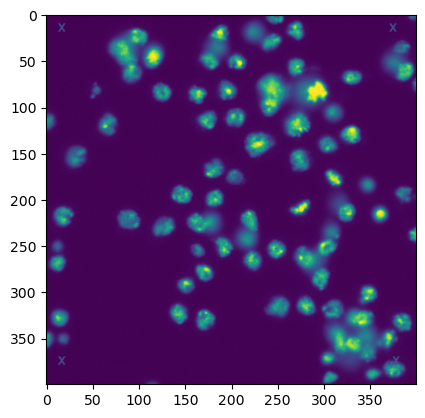

In [5]:
plt.imshow(image);

In [6]:
im_gauss = skimage.filters.gaussian(image,sigma = 10, preserve_range = True)
im_gauss2 = skimage.filters.gaussian(image,sigma = 20, preserve_range = True)
im_frangi = skimage.filters.frangi(image)
im_prewitt = skimage.filters.prewitt(image)
im_meijering = skimage.filters.meijering(image)
im_gauss_laplace = skimage.filters.laplace(skimage.filters.gaussian(image,sigma = 5,preserve_range=True),ksize=10)
im_gradient = skimage.filters.rank.gradient(image,skimage.morphology.disk(8))
im_entropy = skimage.filters.rank.entropy(image,skimage.morphology.disk(8))
im_roberts = skimage.filters.roberts(skimage.filters.gaussian(image,sigma = 5,preserve_range=True))

filtered_stack = np.stack([im_gauss,im_gauss2,im_frangi,im_prewitt,im_meijering,im_gauss_laplace,im_gradient,im_entropy,im_roberts], axis=0)
names = ['Gauss $\sigma$=10', 'Gauss $\sigma$=20','Frangi','Prewitt','Meijering','Gauss+Laplace', 'Gradient',
        'Entropy','Roberts']

In [11]:
from joblib import load

mymodel = load('../models/pix_classifier.joblib')

In [12]:
all_pixels = np.reshape(filtered_stack, (9, filtered_stack.shape[1]*filtered_stack.shape[2])).T

In [14]:
predictions = mymodel.predict(all_pixels)

predicted_image = np.reshape(predictions, image.shape)

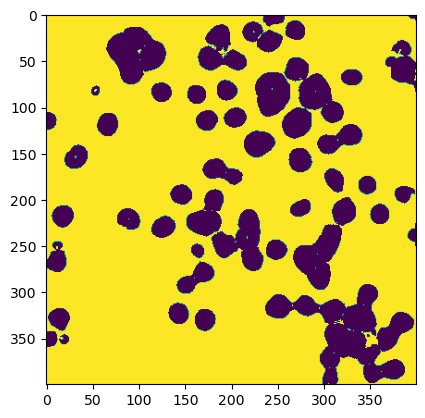

In [15]:
plt.imshow(predicted_image)

or:

In [16]:
import napari

viewer = napari.Viewer()
viewer.add_image(image)
viewer.add_labels(predicted_image);

<Labels layer 'predicted_image' at 0x28080bd00>